In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import tensorflow as tf
from tensorflow.python.framework import ops
import math
import glob
import imageio
import pathlib
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
train_data_dir = '/content/drive/My Drive/dataset/cbsd_train2'
validation_data_dir = './dataset/'
prediction_data = '/content/drive/My Drive/dataset/afterDetection'
nb_train_samples =400 
nb_validation_samples = 100
epochs = 10
batch_size = 16
img_width, img_height = 500, 500

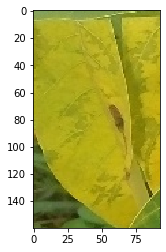

In [3]:
  from imutils import paths
#อิมพอร์ต paths จาก imutils
image_paths = list(paths.list_images(train_data_dir))
#อ่านรูปาภาพสัตว์ทั้งหมดจากโฟลเดอร์
image = cv2.imread(image_paths[10])
#ลองใช้ cv2 อ่านรูปขึ้นมาสักรูป
image = cv2.imread(image_paths[10])
#ลองใช้ cv2 อ่านรูปขึ้นมาสักรูป
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#หลังจากอ่านมาเสร็จแล้ว เราต้องแปลงสีก่อนเพราะ cv2 นั้นเมื่ออ่านรูปเข้ามา จะมีค่าพื้นฐานของสีเป็น BGR ซึ่งสีที่เราใช้ๆกันอยู่อย่างคุ้นตาคือ RGB เพราะฉะนั้นเราต้องแปลงก่อน
plt.figure()
#เราใช้ pyplot ในการโชว์รูปขึ้นมา แต่ก่อนที่เราจะโชว์ขึ้นมาได้เราต้องสร้างตัว figure ขึ้นมาเสียก่อน เหมือนกับการสร้างหน้าต่างโปรแกรมขึ้นมาเพื่อที่จะให้เอารูปที่จะโชว์ไปแปะ
plt.imshow(new_image)
#ใช้ฟังก์ชั่น imshow ในการโชว์รูปออกมา

In [0]:
import random

random.shuffle(image_paths)

data = []
labels = []

for image_path in image_paths:
    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32))
    labels.append(image_path.split('/')[6])
    data.append(image)

['/content/drive/My Drive/dataset/cbsd_train33/cbsd_train3/120.png', '/content/drive/My Drive/dataset/cbsd_train33/cbsd_train3/122.png', '/content/drive/My Drive/dataset/cbsd_train33/cbsd_train3/119.png', '/content/drive/My Drive/dataset/cbsd_train33/cbsd_train3/0.png', '/content/drive/My Drive/dataset/cbsd_train33/cbsd_train3/101.png', '/content/drive/My Drive/dataset/cbsd_train33/cbsd_train3/102.png', '/content/drive/My Drive/dataset/cbsd_train33/cbsd_train3/100.png', '/content/drive/My Drive/dataset/cbsd_train33/cbsd_train3/10.png', '/content/drive/My Drive/dataset/cbsd_train33/cbsd_train3/1.png', '/content/drive/My Drive/dataset/cbsd_train33/cbsd_train3/103.png', '/content/drive/My Drive/dataset/cbsd_train33/cbsd_train3/104.png', '/content/drive/My Drive/dataset/cbsd_train33/cbsd_train3/105.png', '/content/drive/My Drive/dataset/cbsd_train33/cbsd_train3/106.png', '/content/drive/My Drive/dataset/cbsd_train33/cbsd_train3/107.png', '/content/drive/My Drive/dataset/cbsd_train33/cbsd_t

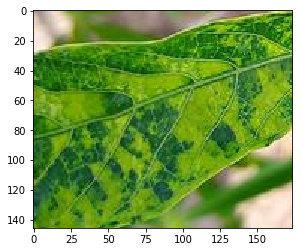

In [0]:
image_paths_test = list(paths.list_images(prediction_data))

image = cv2.imread(image_paths_test[10])
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(new_image)
print(image_paths_test)

In [0]:
#testdata

random.shuffle(image_paths_test)

data2 = []
labels2 = []

for image_paths_tests in image_paths_test:
    image = cv2.imread(image_paths_tests)
    image = cv2.resize(image, (32, 32))
   # labels.append(image_path.split('/')[6])
    data2.append(image)

In [0]:
print(data2)

In [0]:
from sklearn.preprocessing import LabelBinarizer
data = np.array(data)
lb = LabelBinarizer()
data = data/255.0

#labels = np.array(labels)
#labels = lb.fit_transform(labels)
print(labels)

In [0]:
for i in range(len(labels)) :
    if(labels[i] == 'cbsd'):
        labels[i] = [1,0]
    else:
        labels[i] = [0,1]
    print(labels[i])

In [10]:
labels = np.array(labels)
labels = lb.fit_transform(labels)
#print(labels)
print(len(labels))
print(labels.shape)
#print(data)

1013
(1013, 2)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)
X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)
#print(labels)
print(len(X_test))
print(len(X_train))


In [0]:
from keras import backend
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers.core import Dense, Flatten
from keras import optimizers
#อิมพอร์ตพวกของต่างๆที่จะต้องใช้จาก keras
#เรียกใช้ฟังก์ชั่น train_test_split เพื่อทำการสร้างข้อมูลเทรนกับเทส
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), input_shape=(32, 32 ,3), activation='relu', padding='same'))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(32, (3, 3), padding='same'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Dense(256, activation="relu"))
model_2.add(Flatten())
model_2.add(Dense(2, activation='softmax'))
optimizer = optimizers.adam(lr=0.00001)
model_2.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=["accuracy"])
model_2.summary()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
____________________

In [0]:
mhis = model_2.fit(X_train, y_train, epochs=200, validation_split=0.2)

In [0]:
mhis2 = model_2.fit(X_train, y_train, epochs=200, validation_split=0.2)

In [12]:
model_2.save('FirstModel2.h5')
from google.colab import files
files.download("FirstModel2.h5")

NameError: ignored

In [0]:
y_pred = modeltest.predict(X_test)
target_names = ['cbsd','not_cbsd']
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))
preds = model_2.evaluate(x=X_test, y=y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
import sklearn.metrics as metrics
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)

NameError: ignored

In [0]:
plt.plot(mhis.history['loss'])
plt.plot(mhis.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

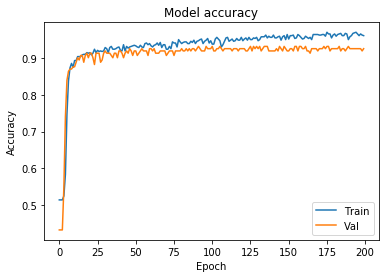

In [0]:
plt.plot(mhis.history['acc'])
plt.plot(mhis.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [0]:
!dir

drive  FirstModel2.h5  sample_data


In [0]:
test_part = image_paths
print(len(test_part))
test_data = data
print(len(test_data))
test_labels = labels
print(len(test_labels))

1013
1013
1013


In [0]:
data2 = np.array(data2)
predictionData = model_2.predict(data2)

In [0]:
print(predictionData)


In [0]:
outPutData = predictionData.argmax(axis=1)
print(predictionData.argmax(axis=1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
# 0 = cbsd / 1 = not_cbsd

c = 0
checNotcnsd = 0
checkcbsd = 0
for imgs in image_paths_test : 
  image = cv2.imread(imgs)
  cv2.imwrite('/content/drive/My Drive/dataset/outPutM2/all/{}.png'.format(c),image)
  if(outPutData[c] == 0):
    #image = cv2.imread(imgs)
    cv2.imwrite('/content/drive/My Drive/dataset/outPutM2/cbsd/{}.png'.format(checkcbsd),image)
    checkcbsd += 1
  else:
    #image = cv2.imread(imgs)
    cv2.imwrite('/content/drive/My Drive/dataset/outPutM2/not_cbsd/{}.png'.format(checNotcnsd),image)
    checNotcnsd += 1
  c += 1

In [0]:
print(checkcbsd)
print(checNotcnsd)

131
1


['/content/drive/My Drive/dataset/afterDetection/cbsd/17_cbsd .png_20.png', '/content/drive/My Drive/dataset/afterDetection/cbsd/17_cbsd .png_22.png', '/content/drive/My Drive/dataset/afterDetection/cbsd/20_cbsd .png_27.png', '/content/drive/My Drive/dataset/afterDetection/cbsd/17_cbsd .png_21.png', '/content/drive/My Drive/dataset/afterDetection/cbsd/20_cbsd .png_29.png', '/content/drive/My Drive/dataset/afterDetection/cbsd/20_cbsd .png_28.png', '/content/drive/My Drive/dataset/afterDetection/cbsd/20_cbsd .png_26.png', '/content/drive/My Drive/dataset/afterDetection/cbsd/20_cbsd .png_30.png', '/content/drive/My Drive/dataset/afterDetection/cbsd/24_cbsd .png_41.png', '/content/drive/My Drive/dataset/afterDetection/cbsd/24_cbsd .png_40.png', '/content/drive/My Drive/dataset/afterDetection/cbsd/24_cbsd .png_42.png', '/content/drive/My Drive/dataset/afterDetection/cbsd/24_cbsd .png_43.png', '/content/drive/My Drive/dataset/afterDetection/cbsd/24_cbsd .png_45.png', '/content/drive/My Drive

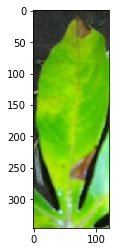

In [0]:
prediction_data = '/content/drive/My Drive/dataset/afterDetection'
image_paths_test = list(paths.list_images(prediction_data))

image = cv2.imread(image_paths_test[10])
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(new_image)
print(image_paths_test)

In [0]:
import random

random.shuffle(image_paths)
random.shuffle(image_paths_test)

data2 = []
labels2 = []

for image_paths_tests in image_paths_test:
    image = cv2.imread(image_paths_tests)
    image = cv2.resize(image, (32, 32))
    labels2.append(image_paths_tests.split('/')[6])
    data2.append(image)

In [0]:
print(labels2)

['not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd',

In [0]:
from sklearn.preprocessing import LabelBinarizer
data2 = np.array(data2)
lb = LabelBinarizer()
data2 = data2/255.0

#labels = np.array(labels)
#labels = lb.fit_transform(labels)
print(labels2)

['not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd',

In [0]:
for i in range(len(labels2)) :
    if(labels2[i] == 'cbsd'):
        labels2[i] = [1,0]
    else:
        labels2[i] = [0,1]
    print(labels2[i])

In [13]:
from keras.models import load_model
from keras import optimizers
modeltest = load_model('/content/drive/My Drive/dataset/dataModel/FirstModel2.h5')
optimizer = optimizers.adam(lr=0.00001)
modeltest.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=["accuracy"])












Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
print(labels2)
labels2 = np.array(labels2)
print(labels2)

In [30]:
#test_data = np.array(test_data)
test_y_pred = modeltest.predict(X_test)
target_names = ['cbsd','not_cbsd']
from sklearn.metrics import accuracy_score, classification_report
test_y_pred = np.array(test_y_pred)
#test_labels = np.array(test_labels)
print(accuracy_score(y_test.argmax(axis=1), test_y_pred.argmax(axis=1)))
preds = modeltest.evaluate(x=X_test, y=y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

0.9787234042553191
141/141 [==============================] - 1s 4ms/step

Loss = 0.07011439043579372
Test Accuracy = 0.9787234046780471


In [28]:
import sklearn.metrics as metrics
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), test_y_pred.argmax(axis=1))
print(classification_report(y_test.argmax(axis=1), test_y_pred.argmax(axis=1), target_names=target_names))
print(matrix)

              precision    recall  f1-score   support

        cbsd       0.99      0.97      0.98        72
    not_cbsd       0.97      0.99      0.98        69

    accuracy                           0.98       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.98      0.98      0.98       141

[[70  2]
 [ 1 68]]
